In [ ]:
# !pip install cmake 'gym[atari]' scipy
import gym
import numpy as np
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00


In [ ]:
env = gym.make("Taxi-v3").env
# env = gym.make("Taxi-v3", render_mode="rgb_array") #, new_step_api=True)
env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


253

In [ ]:
env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [ ]:
env.reset()
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)
env.s = state
env.render()

State: 328


In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
sum_q_arr = np.zeros(100001)

In [ ]:
%%time
"""Question 1: Training the agent"""

# Hyperparameters
alpha = 0.1 # learning rate
gamma = 0.6 # discount factor
epsilon = 0.1 # probability to randomly explore an action

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()
    state = state if (type(state)==int) else state[0]

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) # removed ', _'
        next_state = next_state if type(next_state)==int else next_state[0]

        ### Implement here! ####
        #Update q_table using new data (state, action, next_state, reward)

        q_table[state][action] = (1 - alpha) * q_table[state][action] + alpha * (reward + gamma * np.max(q_table[next_state]))

        # Sanity Check
        # Qold = q_table[state, action]
        # max = np.max(q_table[next_state])
        # Qnew = (1 - alpha) * Qold + alpha * (reward + gamma * max)
        # q_table[state, action] = Qnew

        ########################

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    sum_q_arr[i] = np.sum(q_table)
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 18s, sys: 4.34 s, total: 1min 22s
Wall time: 1min 23s


q_table[1, 1]: -2.3639511027187203
q_table[51, 3]: -2.486569076520827


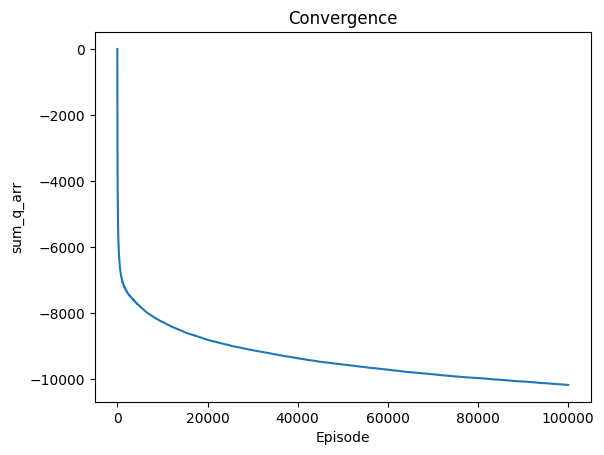

In [ ]:

print("q_table[1, 1]:", q_table[1, 1])
print("q_table[51, 3]:", q_table[51, 3])

plt.plot(sum_q_arr)
plt.xlabel('Episode')
plt.ylabel('sum_q_arr')
plt.title('Convergence')
plt.show()

In [26]:
"""Question 2: Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    state = state if (type(state)==int) else state[0]

    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        state = state if (type(state)==int) else state[0]
        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.89
Average penalties per episode: 0.0
